In [1]:
import pandas as pd
import pickle as pk
import numpy as np
import matplotlib as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [2]:
with open('../1.Data_Processing/dataset-nids.pkl', 'rb') as f:
    X_train, y_train, X_test, y_test = pk.load(f)

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3549974, 7), (3549974,), (508003, 7), (508003,))

In [4]:
gnb = GaussianNB()
abc = AdaBoostClassifier()

In [5]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [7]:
gnb_fit = gnb.fit(X_train, y_train)
abc_fit = abc.fit(X_train, y_train)

In [8]:
y_pred_gnb = gnb_fit.predict_proba(X_test)[::,1]
y_pred_abc = abc_fit.predict_proba(X_test)[::,1]

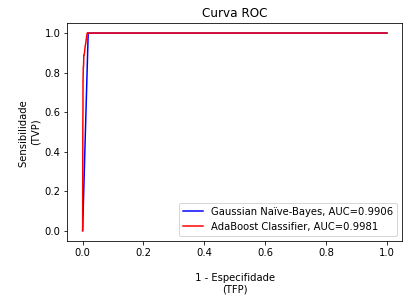

In [9]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_gnb)
auc = roc_auc_score(y_test, y_pred_gnb)
plt.plot(fpr,tpr,color='blue',label="Gaussian Naïve-Bayes, AUC="+str(round(auc,4)))

fpr, tpr, _ = roc_curve(y_test,  y_pred_abc)
auc = roc_auc_score(y_test, y_pred_abc)
plt.plot(fpr,tpr,color='red',label="AdaBoost Classifier, AUC="+str(round(auc,4)))

plt.ylabel('\nSensibilidade \n(TVP)')
plt.xlabel('\n 1 - Especifidade \n(TFP)')
plt.title('Curva ROC')
plt.legend(loc=4)
plt.show()